## Part 4 - Assessing the summaries done

we will employ metrics commonly used in assessing summarization tasks to assess our summaries - ROUGE score.

We will use ROUGE-1 (unigram/single word overlaps), ROUGE-2 (bigram/two-word overlaps), and ROUGE-L - longest common subsequence.

We will then compare between the two and see which summarization method does best.

In [ ]:
import pandas as pd
import rouge_score
import matplotlib.pyplot as plt
import scipy.stats

In [22]:
df = pd.read_csv('df_part_iii.csv')
df

,Unnamed: 0,category,url,title,summary,full_text,extracted_summary,pegasus_summary
0,0,Culture,/mank-citizen-kane-watch-online-stream-streami...,How to Watch 'Citizen Kane' Online After You'v...,"""Mank"" is an inventive retelling of the story ...",Mank sees Netflix celebrating Hollywood's gold...,The Amazon synopsis for the movie gives viewer...,Director David Fincher's new film Citizen Kane...
1,1,Opinion,/bidens-chance-challenge-china-opinion-1552152,Biden's Chance to Challenge China,"China's strategy is relentless, sophisticated ...",When it comes to managing relations with China...,China will not cease its efforts to erode U.S....,"As the new US secretary of state, Joe Biden wi..."
2,2,World,/shootout-rival-mexican-cartel-gang-members-15...,Several Dead In Shootout Between Rival Mexican...,One report suggested dozens had been killed wh...,A shootout in the western Mexican state of Mic...,The attack was said to have begun in the small...,All images are copyrighted.
3,3,World,/china-media-says-us-europe-tensions-inevitabl...,China Media Says U.S.-Europe Tensions Inevitab...,Biden said in an interview published this week...,Chinese state media has predicted more tension...,"On Thursday, the state-run Global Times newspa...",As the Obama administration prepares to leave ...
4,4,Opinion,/san-francisco-jon-ossoff-opinion-1552197,San Francisco Jon Ossoff,"""San Francisco,"" not Georgia, is a more accura...","I refer to ""San Francisco"" Jon Ossoff because ...",Ossoff's defense of the speeches could alienat...,"I'm writing this from San Francisco, where I l..."
...,...,...,...,...,...,...,...,...
1495,1495,My Turn,/i-am-undocumented-my-child-u-s-citizen-why-go...,"'I'm Undocumented, But My Child Is American. W...",I'm her mom. I must be her voice and I must fi...,When I first found out in March that my family...,"As an American citizen, my daughter should als...",In our series of letters from African-American...
1496,1496,Opinion,/wisconsin-no-longer-home-no-longer-safe-opini...,Wisconsin Is No Longer at Home—and No Longer Safe,This week's Supreme Court's decision will cost...,"Here they go again. On Wednesday night, the co...",This is the same Republican legislature that e...,It's déj vu all over again.
1497,1497,U.S.,/trump-coronavirus-vaccine-operation-1504551,Trump Compares Coronavirus Vaccine Search to t...,The president said the program will be unlike ...,President Donald Trump unveiled plans to find ...,Speaking at a press conference in the White Ho...,The Trump administration has launched a new ef...
1498,1498,U.S.,/tsa-check-temperatures-passengers-airports-15...,TSA Plan to Check Passenger Temperatures at Se...,A report claims airport passenger temperature ...,The Transportation Security Administration (TS...,"""The health and safety of our Transportation S...",The Obama administration is reportedly conside...


In [23]:
# Get the fmeasure scores for summary vs extracted_summary
from rouge_score import rouge_scorer

summary = df.iloc[0][4]
extracted_summary = df.iloc[0][6]
pegasus_summary = df.iloc[0][7]

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2' ,'rougeL'], use_stemmer=True)

scores1 = scorer.score(summary, extracted_summary)

s1 = [scores1[i][2] for i in scores1] #get fmeasure scores
print(scores1)
print(s1)

{'rouge1': Score(precision=0.1891891891891892, recall=0.56, fmeasure=0.2828282828282828), 'rouge2': Score(precision=0.0136986301369863, recall=0.041666666666666664, fmeasure=0.020618556701030927), 'rougeL': Score(precision=0.12162162162162163, recall=0.36, fmeasure=0.18181818181818185)}
[0.2828282828282828, 0.020618556701030927, 0.18181818181818185]


In [24]:
# Get the fmeasure scores for summary vs pegasus_summary
scores2 = scorer.score(summary, pegasus_summary)
s2 = [scores2[i][2] for i in scores2]
print(scores2)
print(s2)

{'rouge1': Score(precision=0.23809523809523808, recall=0.2, fmeasure=0.21739130434782608), 'rouge2': Score(precision=0.05, recall=0.041666666666666664, fmeasure=0.04545454545454545), 'rougeL': Score(precision=0.23809523809523808, recall=0.2, fmeasure=0.21739130434782608)}
[0.21739130434782608, 0.04545454545454545, 0.21739130434782608]


In [25]:
print(summary)
print(extracted_summary)
print(pegasus_summary)

"Mank" is an inventive retelling of the story behind the making of "Citizen Kane," a movie thought by many to be the best ever made.
The Amazon synopsis for the movie gives viewers an idea of its legacy: "A story of idealism corrupted by wealth, Citizen Kane is the greatest film of all time and is credited with inspiring more directorial careers than any other film in history."For viewers who prefer to buy or rent the movie, the cheapest places to rent Kane are Amazon, Fandango Now and Redbox, all of whom offer the movie for $2.99.
Director David Fincher's new film Citizen Kane has been commissioned by Netflix to mark the streaming service's 75th anniversary.


In [26]:
extract_rouge_1 = []
extract_rouge_2 = []
extract_rouge_L = []
pegasus_rouge_1 = []
pegasus_rouge_2 = []
pegasus_rouge_L = []

for i in range(0,1500):
    summary = df.iloc[i][4]
    extracted_summary = df.iloc[i][6]
    pegasus_summary = df.iloc[i][7]

    scorer = rouge_scorer.RougeScorer(['rouge1','rouge2' ,'rougeL'], use_stemmer=True)
    scores1 = scorer.score(summary, extracted_summary)
    scores2 = scorer.score(summary, pegasus_summary)

    extract_rouge_1.append(scores1['rouge1'][2])
    extract_rouge_2.append(scores1['rouge2'][2])
    extract_rouge_L.append(scores1['rougeL'][2])

    pegasus_rouge_1.append(scores2['rouge1'][2])
    pegasus_rouge_2.append(scores2['rouge2'][2])
    pegasus_rouge_L.append(scores2['rougeL'][2])
    


In [27]:
df['extract_rouge_1'] = extract_rouge_1
df['extract_rouge_2'] = extract_rouge_2
df['extract_rouge_L'] = extract_rouge_L

df['pegasus_rouge_1'] = pegasus_rouge_1
df['pegasus_rouge_2'] = pegasus_rouge_2
df['pegasus_rouge_L'] = pegasus_rouge_L

df

,Unnamed: 0,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
0,0,Culture,/mank-citizen-kane-watch-online-stream-streami...,How to Watch 'Citizen Kane' Online After You'v...,"""Mank"" is an inventive retelling of the story ...",Mank sees Netflix celebrating Hollywood's gold...,The Amazon synopsis for the movie gives viewer...,Director David Fincher's new film Citizen Kane...,0.282828,0.020619,0.181818,0.217391,0.045455,0.217391
1,1,Opinion,/bidens-chance-challenge-china-opinion-1552152,Biden's Chance to Challenge China,"China's strategy is relentless, sophisticated ...",When it comes to managing relations with China...,China will not cease its efforts to erode U.S....,"As the new US secretary of state, Joe Biden wi...",0.156863,0.020000,0.098039,0.043478,0.000000,0.043478
2,2,World,/shootout-rival-mexican-cartel-gang-members-15...,Several Dead In Shootout Between Rival Mexican...,One report suggested dozens had been killed wh...,A shootout in the western Mexican state of Mic...,The attack was said to have begun in the small...,All images are copyrighted.,0.090909,0.018519,0.036364,0.000000,0.000000,0.000000
3,3,World,/china-media-says-us-europe-tensions-inevitabl...,China Media Says U.S.-Europe Tensions Inevitab...,Biden said in an interview published this week...,Chinese state media has predicted more tension...,"On Thursday, the state-run Global Times newspa...",As the Obama administration prepares to leave ...,0.150943,0.000000,0.094340,0.181818,0.000000,0.145455
4,4,Opinion,/san-francisco-jon-ossoff-opinion-1552197,San Francisco Jon Ossoff,"""San Francisco,"" not Georgia, is a more accura...","I refer to ""San Francisco"" Jon Ossoff because ...",Ossoff's defense of the speeches could alienat...,"I'm writing this from San Francisco, where I l...",0.168421,0.021505,0.105263,0.153846,0.083333,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,My Turn,/i-am-undocumented-my-child-u-s-citizen-why-go...,"'I'm Undocumented, But My Child Is American. W...",I'm her mom. I must be her voice and I must fi...,When I first found out in March that my family...,"As an American citizen, my daughter should als...",In our series of letters from African-American...,0.076923,0.000000,0.057692,0.097561,0.000000,0.097561
1496,1496,Opinion,/wisconsin-no-longer-home-no-longer-safe-opini...,Wisconsin Is No Longer at Home—and No Longer Safe,This week's Supreme Court's decision will cost...,"Here they go again. On Wednesday night, the co...",This is the same Republican legislature that e...,It's déj vu all over again.,0.172414,0.035088,0.120690,0.058824,0.000000,0.058824
1497,1497,U.S.,/trump-coronavirus-vaccine-operation-1504551,Trump Compares Coronavirus Vaccine Search to t...,The president said the program will be unlike ...,President Donald Trump unveiled plans to find ...,Speaking at a press conference in the White Ho...,The Trump administration has launched a new ef...,0.135922,0.039604,0.116505,0.146341,0.000000,0.146341
1498,1498,U.S.,/tsa-check-temperatures-passengers-airports-15...,TSA Plan to Check Passenger Temperatures at Se...,A report claims airport passenger temperature ...,The Transportation Security Administration (TS...,"""The health and safety of our Transportation S...",The Obama administration is reportedly conside...,0.098039,0.000000,0.058824,0.048780,0.000000,0.048780


### Identify the best ROUGE extractive summaries
Define good ROUGE scores to be above 0.6 for extractive summaries.

In [40]:
# Filter your DataFrame based on extractive summary ROUGE
df_extractive = df[(df.extract_rouge_1 > 0.6) & (df.extract_rouge_2 > 0.6) & (df.extract_rouge_L > 0.6)]
df_extractive

,Unnamed: 0,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
42,42,World,/hhs-secretary-azar-says-china-hiding-covid-19...,HHS Secretary Azar Says China Hiding COVID-19 ...,Health and Human Services Secretary Alex Azar'...,Health and Human Services Secretary Alex Azar'...,One piece published Saturday warned the U.S. v...,The United States and China are engaged in a w...,0.661290,0.655738,0.661290,0.149254,0.000000,0.089552
557,557,Politics,/president-trump-threatens-destroy-turkish-eco...,President Trump Threatens to Destroy Turkish E...,White House correspondent for the New York Tim...,White House correspondent for The New York Tim...,White House correspondent for The New York Tim...,The White House has confirmed that a letter se...,0.697248,0.654206,0.697248,0.576271,0.210526,0.372881
563,563,World,/new-iditarod-ceo-bucks-trend-meets-peta-after...,Iditarod CEO Meets with Animal Rights Activist...,New Iditarod CEO Rob Urbach has announced that...,New Iditarod CEO Rob Urbach has announced that...,PETA published an article about the race on it...,The Iditarod Trail Sled Dog Race has a new boss.,0.641221,0.635659,0.641221,0.192308,0.000000,0.076923
841,841,News,/trumps-labor-board-has-systematically-damaged...,Trump Labor Board Has 'Systematically' Damaged...,"The report says that the labor board, which is...",President Donald Trump's National Labor Relati...,"The report says that the labor board, which is...",The Trump administration has been accused by a...,0.677966,0.672414,0.677966,0.145455,0.000000,0.109091
888,888,Opinion,/bitcoin-overnight-success-decade-making-opini...,Bitcoin: An Overnight Success a Decade in the ...,"In the current craze, which is at least the fo...","Is it too late to buy some bitcoin?"" ""What abo...","In the current craze, which is at least the fo...","""What's the value of ethereum?""",0.651163,0.642857,0.651163,0.117647,0.000000,0.117647
1204,1204,Culture,/august-alsina-says-relationship-jada-pinkett-...,August Alsina Says Relationship With Jada Pink...,"""I totally gave myself to that relationship fo...","In an interview released Tuesday, singer-songw...","""I always took the position that I'm here at t...",Jada Pinkett Smith and August Alsina have been...,0.638298,0.608696,0.638298,0.254545,0.037736,0.109091


In [45]:
# Print out one summary and one abstracted summary
print("Summary:", df_pegasus.iloc[3][4])
print("Extracted summary:", df_extractive.iloc[3][6])

Summary: A federal judge on Monday ruled Pennsylvania Governor Tom Wolf's executive actions to close or restrict non–life sustaining businesses during the coronavirus pandemic are unconstitutional.
Extracted summary: The report says that the labor board, which is supposed to protect the interests of workers, has "elevated corporate interests above those of working men and women and have routinely betrayed the statute they are responsible for administering and enforcing."The researchers depict effort to weaken workers' rights as a concerted effort motivated in part by deference to the U.S. Chamber of Commerce, a powerful business lobby organization that has sought to provide more power to employers.


In [33]:
#Filter your DataFrame based on abstractive summary ROUGE
df_pegasus = df[(df.pegasus_rouge_1 > 0.7) & (df.pegasus_rouge_2 > 0.7) & (df.pegasus_rouge_L > 0.7)]
df_pegasus

,Unnamed: 0,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
234,234,Education,/leaders-christian-colleges-discuss-image-dive...,Christian College Leaders Hold Conference to D...,Leaders from Christian-affiliated universities...,Correction 10/9/2019: An earlier version of th...,"""We have crafted a conference with purposeful,...",Leaders from Christian-affiliated universities...,0.269663,0.068966,0.179775,0.933333,0.930233,0.933333
446,446,U.S.,/georgia-lt-governor-says-trump-gop-risk-alien...,"Georgia Lt. Gov. Says Trump, GOP Risk 'Alienat...","""I would urge the president, I would urge the ...",One of Georgia's top officials is calling for ...,One of Georgia's top officials is calling for ...,"""I would urge the president, and the Republica...",0.159091,0.023256,0.113636,0.777778,0.705882,0.777778
838,838,U.S.,/millions-gallons-sewer-water-flow-mexico-us-d...,Trapped Body Causes 14.5M Gallons of Mexican S...,A trapped dead body clogged up pumps in the Ti...,A trapped dead body clogged up pumps in the Ti...,This caused trash to build up and plug the str...,A dead body clogged up pumps in the Tijuana Ri...,0.297030,0.040404,0.178218,0.923077,0.888889,0.923077
1265,1265,Business,/judge-rules-pennsylvanias-new-normal-pandemic...,Judge Rules Pennsylvania's 'New Normal' COVID ...,A federal judge on Monday ruled Pennsylvania G...,A federal judge on Monday ruled Pennsylvania G...,"""[T]he congregate gathering limits imposed by ...",A federal judge on Monday ruled Pennsylvania G...,0.082353,0.000000,0.047059,1.000000,1.000000,1.000000
1331,1331,Culture,/every-celebrity-boycotting-instagram-facebook...,Every Celebrity Boycotting Facebook and Instagram,From Kim Kardashian to Mark Ruffalo—here are t...,Kim Kardashian West is leading a number of cel...,#StopHateForProfit ðð¾ðð¾ðð¾ð...,Kim Kardashian West is leading a number of cel...,0.175258,0.062500,0.123711,0.779661,0.736842,0.779661


In [44]:
# Print out one summary and one abstracted summary
print("Summary:", df_pegasus.iloc[3][4])
print("Abstracted summary:", df_pegasus.iloc[3][7])

summary: A federal judge on Monday ruled Pennsylvania Governor Tom Wolf's executive actions to close or restrict non–life sustaining businesses during the coronavirus pandemic are unconstitutional.
abstracted summary: A federal judge on Monday ruled Pennsylvania Governor Tom Wolf's executive actions to close or restrict non-life sustaining businesses during the coronavirus pandemic are unconstitutional.


<AxesSubplot:ylabel='Frequency'>

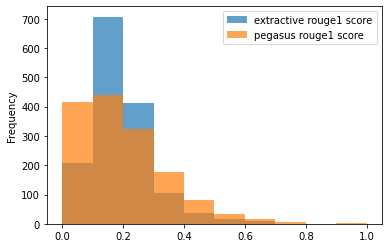

In [47]:
# Plot ROUGE-1 score histograms

to_plot = pd.DataFrame({'extractive rouge1 score': df['extract_rouge_1'], 'pegasus rouge1 score': df['pegasus_rouge_1']})
to_plot.plot.hist(alpha=0.7)

In [48]:
# Print extractive and abstractive ROUGE-1 scores
print(df['extract_rouge_1'].mean())
print(df['pegasus_rouge_1'].mean())

0.1937615870108561
0.19608890377124089


The distribution for the two ROUGE-1 scores is not likely to be normal, hence I will make use of Mann-Whitney U test. 

If the p-value is 0.05 and below, we reject the null hypothesis that the two distributions are the same.

In [49]:
# Conduct a Mann-Whitney U test of difference for ROUGE-1 scores
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df['extract_rouge_1'], df['pegasus_rouge_1'])
results


MannwhitneyuResult(statistic=1094907.0, pvalue=0.10224300048715945)

In [51]:
print("P-value is",results[1], "hence we do not reject the null hypothesis that the two distributions are the same.")

P-value is 0.10224300048715945 hence we do not reject the null hypothesis that the two distributions are the same.


<AxesSubplot:ylabel='Frequency'>

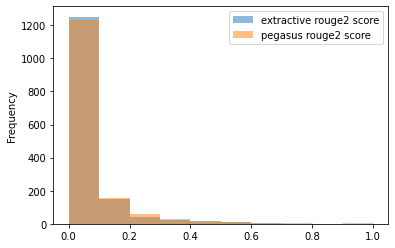

In [57]:
# Perform the histogram plotting for ROUGE-2 scores 
to_plot1 = pd.DataFrame({'extractive rouge2 score': df['extract_rouge_2'], 'pegasus rouge2 score': df['pegasus_rouge_2']})
to_plot1.plot.hist(alpha=0.5)


In [16]:
# Get the means of ROUGE-2 from extractive and abstractive summaries
print(df['extract_rouge_2'].mean())
print(df['pegasus_rouge_2'].mean())


0.06076567198328606
0.053983711625331166


In [17]:
# Perform Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results1 = mannwhitneyu(df['extract_rouge_2'], df['pegasus_rouge_2'])
results1

MannwhitneyuResult(statistic=919849.5, pvalue=8.742831872822146e-20)

In [54]:
 print("P-value is",results[1], ", less than 0.05, hence we reject the null hypothesis and conclude that the two distributions are distinct.")

P-value is 0.10224300048715945 , less than 0.05, hence we reject the null hypothesis and conclude that the two distributions are distinct.


0.13955348328667186
0.15065807010138815
P-value is 0.02654231851977434 , less than 0.05, hence we reject the null hypothesis and conclude that the two distributions are distinct.


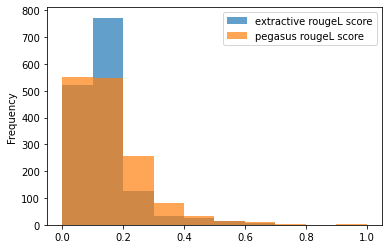

In [58]:
# Compare the ROUGE-L scores
to_plot2 = pd.DataFrame({'extractive rougeL score': df['extract_rouge_L'], 'pegasus rougeL score': df['pegasus_rouge_L']})
to_plot2.plot.hist(alpha=0.7)

print(df['extract_rouge_L'].mean())
print(df['pegasus_rouge_L'].mean())

from scipy.stats import mannwhitneyu
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df['extract_rouge_L'], df['pegasus_rouge_L'])
print("P-value is",results[1], ", less than 0.05, hence we reject the null hypothesis and conclude that the two distributions are distinct.")